# Import

In [43]:
# 📂 File and OS management
import os  # OS operations and path management
import zipfile  # Handling ZIP archives
from io import BytesIO  # In-memory data streams

# 📊 Data processing and analysis
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical and matrix operations

# 🔄 Web requests and data retrieval
import requests  # HTTP requests to fetch data

# 📖 Natural Language Processing (NLP)
import nltk  # NLP library for tokenization, stemming, lemmatization
from nltk.corpus import stopwords, wordnet  # Stopwords and WordNet for synonyms and meanings
from nltk.stem import WordNetLemmatizer  # Word lemmatization

# 🏗️ Topic modeling with Gensim
import gensim  # Topic modeling and text processing
from gensim.utils import simple_preprocess  # Basic text preprocessing
import gensim.corpora as corpora  # Corpus and dictionary handling
from gensim.models import CoherenceModel  # Coherence scoring for topic models

# 📊 Data visualization
import matplotlib.pyplot as plt  # Plotting and visualization
import seaborn as sns  # Statistical data visualization

# 🔍 Machine learning and text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF vectorization
from sklearn.model_selection import train_test_split  # Splitting datasets for training and testing
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.metrics import classification_report, accuracy_score  # Model evaluation metrics
from sklearn.preprocessing import OneHotEncoder  # One-hot encoding for categorical features
from sklearn.metrics.pairwise import cosine_similarity  # Cosine similarity calculation
from sklearn.model_selection import GridSearchCV  # Hyperparameter tuning with grid search
from sklearn.pipeline import Pipeline  # Building machine learning pipelines

# 💾 Saving and loading models
import pickle  # Serialization and deserialization of Python objects

# 🛠️ Miscellaneous
from pprint import pprint  # Pretty-printing data structures

In [2]:
# Dataset URL
url = 'https://proai-datasets.s3.eu-west-3.amazonaws.com/fake_news.zip'

# Download the ZIP file directly into memory
print('Downloading the dataset...')
response = requests.get(url)
zip_file = zipfile.ZipFile(BytesIO(response.content))

# Extract files into the 'fake_news_data' folder
extract_path = 'fake_news_data'
zip_file.extractall(extract_path)
print('Extraction completed!')

# Load the CSV files into Pandas DataFrames
fake_news_path = os.path.join(extract_path, 'Fake.csv')
true_news_path = os.path.join(extract_path, 'True.csv')

df_fake = pd.read_csv(fake_news_path)
df_true = pd.read_csv(true_news_path)

# Display basic information
print(f'\nFake News Dataset: {df_fake.shape[0]} rows, {df_fake.shape[1]} columns')
print(f'True News Dataset: {df_true.shape[0]} rows, {df_true.shape[1]} columns')

print('\nSample Fake News:')
print(df_fake.head())

print('\nSample True News:')
print(df_true.head())

Extraction completed!

Fake News Dataset: 23481 rows, 4 columns
True News Dataset: 21417 rows, 4 columns

Sample Fake News:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  

Sample True New

# Preprocessing

## Missing data?

In [ ]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


**There are no missing values**, all row and cols are populated.

## Inconsistent data?

### `date`

In [3]:
# Function to check if the 7th OR 8th character from the right is a digit (date column)
def is_valid_date(date_str):
    if isinstance(date_str, str) and len(date_str) >= 8:
        return date_str[-7].isdigit() or date_str[-8].isdigit()
    return False

# Create a validation column for date consistency
df_fake['date_valid'] = df_fake['date'].apply(is_valid_date)
df_true['date_valid'] = df_true['date'].apply(is_valid_date)

# Identify inconsistent dates
invalid_fake_dates = df_fake[~df_fake['date_valid']]
invalid_true_dates = df_true[~df_true['date_valid']]

# Count the number of inconsistent rows
num_invalid_fake = len(invalid_fake_dates)
num_invalid_true = len(invalid_true_dates)

# Display results
print(f'\nNumber of inconsistent dates in Fake News dataset: {num_invalid_fake}')
if num_invalid_fake > 0:
    print('\nSample inconsistent dates in Fake News dataset:')
    print(invalid_fake_dates[['date']].head())

print(f'\nNumber of inconsistent dates in True News dataset: {num_invalid_true}')
if num_invalid_true > 0:
    print('\nSample inconsistent dates in True News dataset:')
    print(invalid_true_dates[['date']].head())

# Drop the temporary validation column
df_fake.drop(columns=['date_valid'], inplace=True)
df_true.drop(columns=['date_valid'], inplace=True)


Number of inconsistent dates in Fake News dataset: 10

Sample inconsistent dates in Fake News dataset:
                                                    date
9358   https://100percentfedup.com/served-roy-moore-v...
15507  https://100percentfedup.com/video-hillary-aske...
15508  https://100percentfedup.com/12-yr-old-black-co...
15839  https://fedup.wpengine.com/wp-content/uploads/...
15840  https://fedup.wpengine.com/wp-content/uploads/...

Number of inconsistent dates in True News dataset: 0


### `subject`

In [ ]:
df_fake['subject'].value_counts()

,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


In [ ]:
df_true['subject'].value_counts()

,count
subject,
politicsNews,11272
worldnews,10145


### `text`

In [ ]:
df_fake['text'].apply(len).describe()

,text
count,23481.000000
mean,2547.396235
std,2532.884399
min,1.000000
25%,1433.000000
50%,2166.000000
75%,3032.000000
max,51794.000000


In [ ]:
df_true['text'].apply(len).describe()

,text
count,21417.000000
mean,2383.278517
std,1684.835730
min,1.000000
25%,914.000000
50%,2222.000000
75%,3237.000000
max,29781.000000


In [4]:
# Identify articles with less than 10 characters in the 'text' column
short_texts_fake = df_fake[df_fake['text'].apply(len) <= 10]
short_texts_true = df_true[df_true['text'].apply(len) <= 10]

# Count the occurrences
num_short_fake = len(short_texts_fake)
num_short_true = len(short_texts_true)

# Display results
print(f'\nNumber of fake news articles with less than 10 characters: {num_short_fake}')
if num_short_fake > 0:
    print('\nSample of fake news articles with short text:')
    print(short_texts_fake[['title', 'text']].head())

print(f'\nNumber of true news articles with less than 10 characters: {num_short_true}')
if num_short_true > 0:
    print('\nSample of true news articles with short text:')
    print(short_texts_true[['title', 'text']].head())


Number of fake news articles with less than 10 characters: 653

Sample of fake news articles with short text:
                                                   title    text
10923  TAKE OUR POLL: Who Do You Think President Trum...        
11041  Joe Scarborough BERATES Mika Brzezinski Over “...        
11117  MY FAVORITE EXCUSES…Featuring Hillary Rotten C...  Enjoy:
11190  WATCH TUCKER CARLSON Scorch Sanctuary City May...        
11225  MAYOR OF SANCTUARY CITY: Trump Trying To Make ...        

Number of true news articles with less than 10 characters: 1

Sample of true news articles with short text:
                               title text
8970  Graphic: Supreme Court roundup     


## Duplicates?

In [ ]:
df_fake.duplicated().sum()

3

In [ ]:
df_true.duplicated().sum()

206

## Cleaning

In [5]:
# Function to parse different date formats
def parse_date(date_str):
    if isinstance(date_str, str):
        date_str = date_str.strip()  # Remove leading/trailing spaces

    if pd.isna(date_str) or date_str == "":
        return np.nan  # Return NaN if the value is missing or empty

    formats = [
        "%Y-%m-%d",   # 2024-01-15
        "%d-%m-%Y",   # 15-01-2024
        "%m-%d-%Y",   # 01-15-2024 (USA)
        "%d/%m/%Y",   # 15/01/2024
        "%m/%d/%Y",   # 01/15/2024 (USA)
        "%d.%m.%Y",   # 15.01.2024
        "%Y/%m/%d",   # 2024/01/15
        "%B %d, %Y",  # January 15, 2024
        "%b %d, %Y",  # Jan 15, 2024
        "%d-%b-%Y",   # 15-Jan-2024
        "%d-%b-%y",   # 15-Jan-24
        "%b %d, %y",  # Jan 15, 24
        "%d %B %Y",   # 15 January 2024
        "%d %b %Y",   # 15 Jan 2024
        "%Y.%m.%d",   # 2024.01.15
        "%d %b %y",   # 15 Jan 24
    ]

    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue

    return np.nan  # If no format matches, return NaN

# Apply the function to the date column
df_fake['date'] = df_fake['date'].astype(str).str.strip().apply(parse_date)
df_true['date'] = df_true['date'].astype(str).str.strip().apply(parse_date)

# Check how many dates are still NaT
num_nat_fake = df_fake['date'].isna().sum()
num_nat_true = df_true['date'].isna().sum()

print(f'\nRemaining NaT values in Fake News dataset: {num_nat_fake}')
if num_nat_fake > 0:
    print('\nSample of Fake News articles with NaT values:')
    print(df_fake[df_fake['date'].isna()][['title', 'date']].sample(min(5, num_nat_fake)))

print(f'\nRemaining NaT values in True News dataset: {num_nat_true}')
if num_nat_true > 0:
    print('\nSample of True News articles with NaT values:')
    print(df_true[df_true['date'].isna()][['title', 'date']].sample(min(5, num_nat_true)))


Remaining NaT values in Fake News dataset: 10

Sample of Fake News articles with NaT values:
                                                   title date
15839  https://fedup.wpengine.com/wp-content/uploads/...  NaT
15508  https://100percentfedup.com/12-yr-old-black-co...  NaT
17432  https://fedup.wpengine.com/wp-content/uploads/...  NaT
17433  https://fedup.wpengine.com/wp-content/uploads/...  NaT
21870  https://fedup.wpengine.com/wp-content/uploads/...  NaT

Remaining NaT values in True News dataset: 0


In [ ]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    23481 non-null  object        
 1   text     23481 non-null  object        
 2   subject  23481 non-null  object        
 3   date     23471 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 733.9+ KB


**I will not drop these rows because NLP Model doesn't need it**.

I'll remove for now only rows whose `text` <= 10.

In [6]:
# Remove rows with text ≤ 10 characters using existing filtered data
df_fake = df_fake.drop(short_texts_fake.index)
df_true = df_true.drop(short_texts_true.index)

# Display updated dataset sizes
print(f'\nFake News dataset after text length filtering: {df_fake.shape[0]} rows, {df_fake.shape[1]} columns')
print(f'True News dataset after text length filtering: {df_true.shape[0]} rows, {df_true.shape[1]} columns')


Fake News dataset after text length filtering: 22828 rows, 4 columns
True News dataset after text length filtering: 21416 rows, 4 columns


# 1) Data analysis

> Per quanto riguarda la domanda 3, quando si parla di 'pattern' nei titoli delle fake news, si fa riferimento a schemi ricorrenti o caratteristiche che possono differenziarli dai titoli di notizie vere. Un 'pattern' può essere un elemento linguistico, come l'uso di certe parole chiave esagerate o sensazionalistiche, una struttura frasale particolare, oppure l'uso di determinati simboli o segni di punteggiatura. L'obiettivo di identificare questi pattern è quello di trovare elementi distintivi che possano aiutare a classificare automaticamente una notizia come vera o falsa utilizzando metodi di data science e machine learning. Un'analisi dei pattern può includere, per esempio, tecniche di processamento del linguaggio naturale (NLP), analisi testuale e statistiche descrittive per identificare tratti comuni nei titoli delle fake news.





## Are fake news more frequent in a certain category?

In [ ]:
df_fake['subject'].value_counts()

,count
subject,
News,9050
politics,6419
left-news,4302
Government News,1496
US_News,783
Middle-east,778


**Fake news are much more frequent in News category**.

## Are there any topics that are more susceptible to fake news?

### Merge dfs

In [7]:
# Add a label column (1 = Fake, 0 = True)
df_fake['label'] = 1
df_true['label'] = 0

# Merge the datasets
df_combined = pd.concat([df_fake, df_true], axis=0).reset_index(drop=True)

# Check the merged dataset
print(df_combined[['title', 'label']].head())
print(df_combined['label'].value_counts())

                                               title  label
0   Donald Trump Sends Out Embarrassing New Year’...      1
1   Drunk Bragging Trump Staffer Started Russian ...      1
2   Sheriff David Clarke Becomes An Internet Joke...      1
3   Trump Is So Obsessed He Even Has Obama’s Name...      1
4   Pope Francis Just Called Out Donald Trump Dur...      1
label
1    22828
0    21416
Name: count, dtype: int64


### Topics

In [8]:
# =====================
# 📌 DOWNLOAD RESOURCES
# =====================

# Download stopwords and lemmatization resources
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [9]:
# ============================
# 📌 TEXT PROCESSING FUNCTIONS
# ============================

# Function to tokenize and clean text
def sent_to_words(items):
    for item in items:
        yield simple_preprocess(item, deacc=True)  # Tokenization and punctuation removal

# Function to remove stopwords and short words
def remove_stopwords(texts):
    return [[word for word in words if word not in stop_words and len(word) >= 5 and word != "subject"] for words in texts]

# Function to lemmatize words
def lemmatize_words(texts):
    return [[lemmatizer.lemmatize(word) for word in words] for words in texts]

In [10]:
# =====================
# 📌 DATA PREPROCESSING
# =====================

# Convert titles to list and preprocess them
documents = df_combined["title"].dropna().tolist()
data_words = list(sent_to_words(documents))
data_words = remove_stopwords(data_words)  # Remove stopwords
data_words = lemmatize_words(data_words)   # Apply lemmatization

# Create dictionary and convert documents to bag-of-words format
id2word = corpora.Dictionary(data_words)
corpus = [id2word.doc2bow(text) for text in data_words]

In [11]:
documents[0]

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing'

In [12]:
data_words[0]

['donald', 'trump', 'sends', 'embarrassing', 'message', 'disturbing']

In [13]:
print(f"Total words in dictionary: {len(id2word)}")

Total words in dictionary: 15559


In [14]:
print("\nSample words from dictionary:")
for i, word in list(id2word.items())[:10]:  # Show the first 10 words
    print(f"ID {i}: {word}")


Sample words from dictionary:
ID 0: disturbing
ID 1: donald
ID 2: embarrassing
ID 3: message
ID 4: sends
ID 5: trump
ID 6: bragging
ID 7: collusion
ID 8: drunk
ID 9: investigation


In [15]:
corpus[0]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]

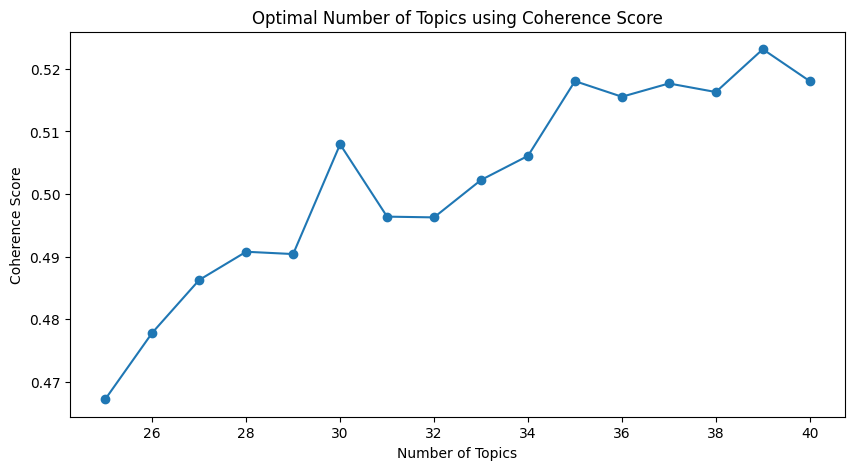


Optimal number of topics based on Coherence Score: 39
CPU times: user 10min 29s, sys: 31.6 s, total: 11min
Wall time: 13min 15s


In [19]:
%%time

# ====================================
# 📌 FIND THE OPTIMAL NUMBER OF TOPICS
# ====================================

coherence_scores = []
topic_range = range(25, 41)  # Test topics from 25 to 40

for num in topic_range:
    lda_test = gensim.models.LdaMulticore(
        corpus=corpus,
        id2word=id2word,
        num_topics=num,
        passes=3,
        workers=1,
        random_state=42
    )
    coherence_model = CoherenceModel(model=lda_test, texts=data_words, dictionary=id2word, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot coherence scores
plt.figure(figsize=(10,5))
plt.plot(topic_range, coherence_scores, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics using Coherence Score")
plt.show()

# Choose the best number of topics (where coherence is highest)
optimal_topics = topic_range[coherence_scores.index(max(coherence_scores))]
print(f"\nOptimal number of topics based on Coherence Score: {optimal_topics}")

### Semantic distance between topics
to deduce their heterogeneity

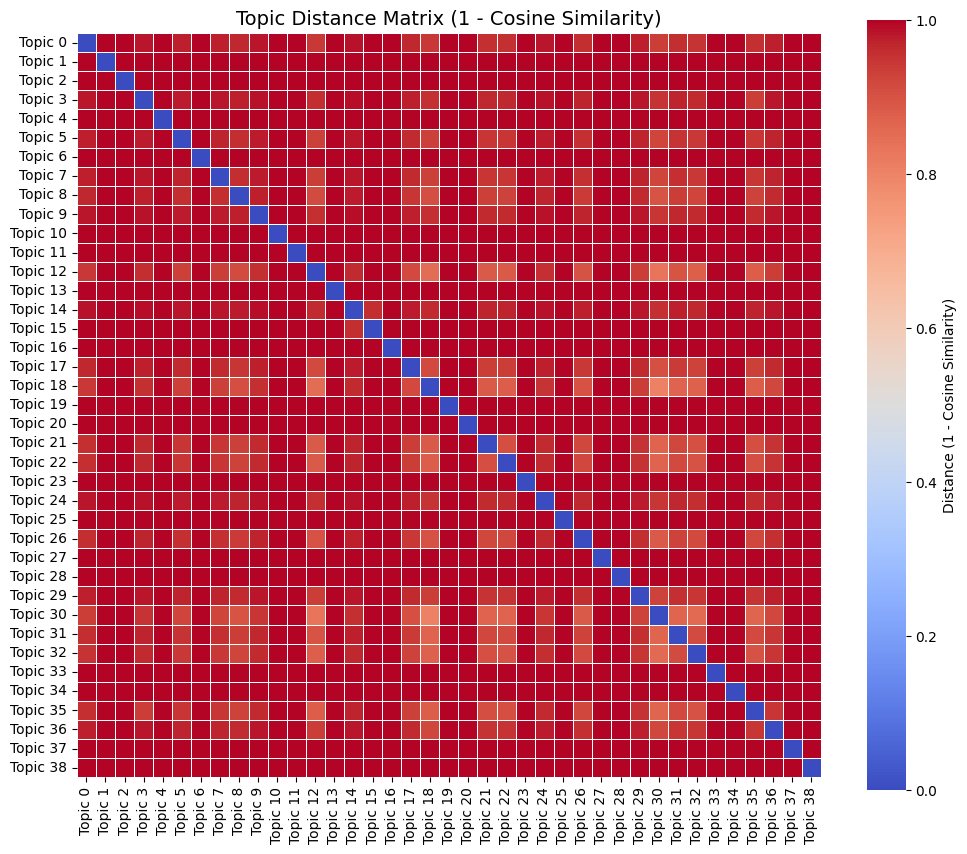

In [24]:
# ========================
# 📌 TRAIN FINAL LDA MODEL
# ========================

lda_model = gensim.models.LdaMulticore(
    corpus=corpus,
    id2word=id2word,
    num_topics=optimal_topics,
    passes=5,  # More passes for a better model
    workers=1,
    random_state=42
)


# ==============================
# 📌 EXTRACT TOP WORDS PER TOPIC
# ==============================

num_words = 10  # Number of word per topic to consider
topic_word_vectors = []  # Inizialization of topic vector list

for topic_id in range(optimal_topics):
    # Obtain top words per each topic with weights
    words_weights = lda_model.show_topic(topic_id, topn=num_words)
    words = [word for word, weight in words_weights]

    # Create a sparse vector per topic with words weights
    vector = np.zeros(len(id2word))
    for word, weight in words_weights:
        if word in id2word.token2id:  # Check if word is in dict
            vector[id2word.token2id[word]] = weight  # Assign word weight

    topic_word_vectors.append(vector)


# ============================
# 📌 COMPUTE COSINE SIMILARITY
# ============================

# Convert vectors list to array NumPy
topic_word_matrix = np.array(topic_word_vectors)

# Compute cosine similarity between topics
cosine_sim_matrix = cosine_similarity(topic_word_matrix)

# Convert similarity in distance
topic_distance_matrix = 1 - cosine_sim_matrix


# ==================
# 📌 DISTANCE MATRIX
# ==================

plt.figure(figsize=(12, 10))
sns.heatmap(topic_distance_matrix, cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=[f"Topic {i}" for i in range(optimal_topics)],
            yticklabels=[f"Topic {i}" for i in range(optimal_topics)],
            cbar_kws={'label': 'Distance (1 - Cosine Similarity)'})
plt.title("Topic Distance Matrix (1 - Cosine Similarity)", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

**Heatmap shows that the topics are very distinct from each other**.

### Final answer

<Figure size 1200x600 with 0 Axes>

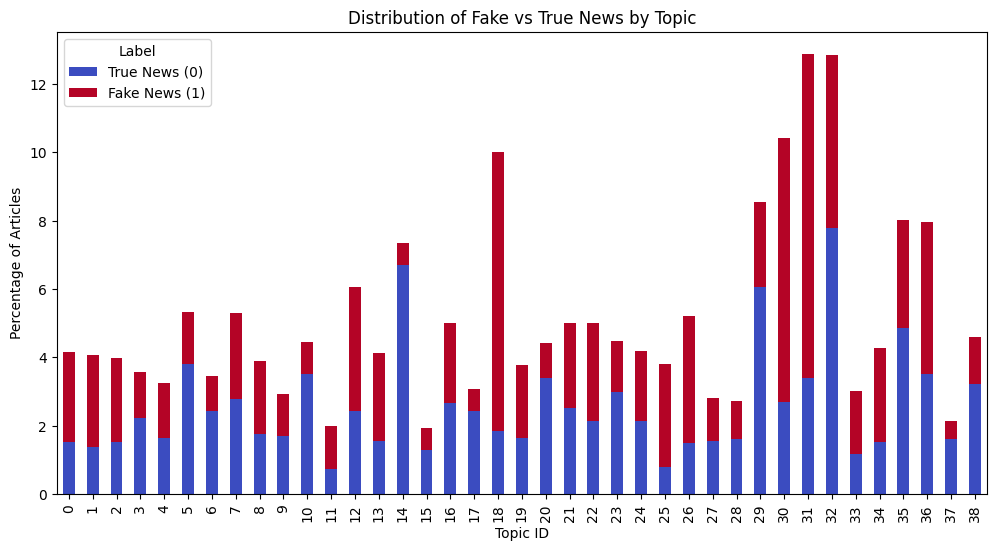

In [29]:
# =========================================
# 📌 ASSIGN DOMINANT TOPIC TO EACH DOCUMENT
# =========================================

# Get the dominant topic for each document
df_combined['dominant_topic'] = [
    max(doc, key=lambda x: x[1])[0] if doc else None for doc in lda_model[corpus]
]

# ====================================
# 📌 COUNT FAKE VS TRUE NEWS PER TOPIC
# ====================================

# Group by label (0 = True, 1 = Fake) and dominant topic
topic_distribution = df_combined.groupby(['label', 'dominant_topic']).size().unstack()

# Normalize by row to get percentages
topic_distribution_normalized = topic_distribution.div(topic_distribution.sum(axis=1), axis=0) * 100


# ===============================================
# 📌 PLOT FAKE VS TRUE NEWS DISTRIBUTION BY TOPIC
# ===============================================

plt.figure(figsize=(12, 6))
topic_distribution_normalized.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.xlabel("Topic ID")
plt.ylabel("Percentage of Articles")
plt.title("Distribution of Fake vs True News by Topic")
plt.legend(title="Label", labels=["True News (0)", "Fake News (1)"])
plt.xticks(rotation=90)
plt.show()

# Show the percentage of Fake News per topic
fake_news_percentage = topic_distribution_normalized.loc[1]  # Only fake news row
true_news_percentage = topic_distribution_normalized.loc[0]  # Only true news row

**Topic 18, 30 and 31 are more inclined to make the article fake news**. Let's see some examples.

## Do fake news headlines have recurring patterns?

In [30]:
# Print the top words for the topics with the highest fake news percentage
for topic_id in [18, 30, 31]:
    print(f"\nTopic {topic_id}:")
    print(lda_model.print_topic(topic_id, topn=10))


Topic 18:
0.102*"probe" + 0.075*"british" + 0.065*"trump" + 0.038*"student" + 0.036*"tension" + 0.035*"video" + 0.032*"supporter" + 0.032*"call" + 0.028*"business" + 0.028*"finance"

Topic 30:
0.169*"saudi" + 0.091*"trump" + 0.045*"arabia" + 0.035*"donald" + 0.033*"economic" + 0.025*"video" + 0.024*"forum" + 0.021*"friday" + 0.020*"message" + 0.015*"francis"

Topic 31:
0.143*"clinton" + 0.083*"campaign" + 0.082*"hillary" + 0.057*"trump" + 0.052*"agree" + 0.033*"email" + 0.028*"market" + 0.027*"video" + 0.026*"adviser" + 0.022*"ousted"


**Patterns highlighted in fake news headlines**:

- The name "Trump" appears in all three topics
- The word "video" is present in all three topics, suggesting that many fake news uses the video format to spread
- Names of famous people involved in scandals
- Words that evoke tension or sensational news

# Model training & Evaluation

**Why we won't use `subject`**:

can lead to data leakage, because fake_df has different categories from true_df.

The model might learn to associate certain categories with fake or true news instead of learning actual textual patterns.


Accuracy: 0.9320827212114363

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      4296
           1       0.94      0.93      0.93      4553

    accuracy                           0.93      8849
   macro avg       0.93      0.93      0.93      8849
weighted avg       0.93      0.93      0.93      8849



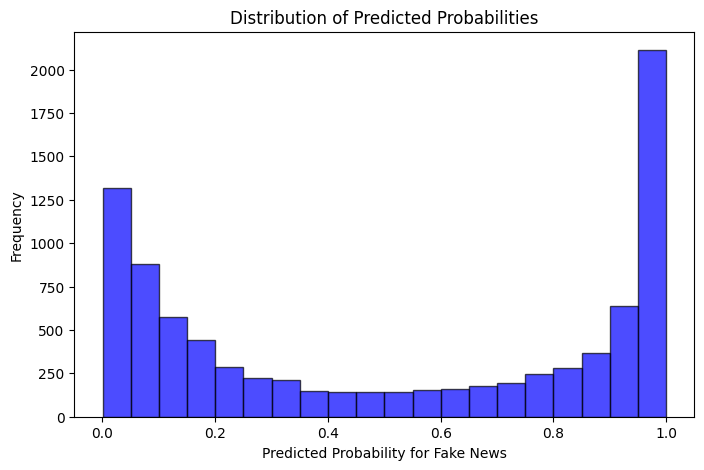

In [36]:
# ===========================
# 📌 PREPROCESSING FUNCTION
# ===========================

# Function to extract keywords from titles (basic preprocessing)
def extract_keywords(title):
    """ Extracts keywords by removing stopwords and short words. """
    words = title.lower().split()  # Convert to lowercase and split words
    keywords = [word for word in words if len(word) > 3]  # Remove very short words
    return " ".join(keywords)  # Return processed title


# ======================
# 📌 LOAD AND CLEAN DATA
# ======================

df_combined.drop(columns=['subject'], inplace=True)  # Remove subject to avoid data leakage

# Apply keyword extraction to the title
df_combined['processed_title'] = df_combined['title'].apply(extract_keywords)


# =======================
# 📌 TF-IDF VECTORIZATION
# =======================

# Convert processed titles into numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = vectorizer.fit_transform(df_combined['processed_title'])  # Transform titles

# Target variable
y = df_combined['label']

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


# ===============================
# 📌 TRAIN MACHINE LEARNING MODEL
# ===============================

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# ===================
# 📌 MODEL EVALUATION
# ===================

# Print accuracy and classification report
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# =================================
# 📌 PROBABILITY DISTRIBUTION CHECK
# =================================

# Get prediction probabilities for Fake News
y_prob = model.predict_proba(X_test)[:, 1]

# Plot histogram of predicted probabilities
plt.figure(figsize=(8,5))
plt.hist(y_prob, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel("Predicted Probability for Fake News")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities")
plt.show()

**Seems that the model done a great job to distinguish fake news from true ones**.

And it is pretty sure about his results.

# Try some optimizations

## Grid Search & L2
looking for best params

In [39]:
# =========================================
# 📌 PIPELINE: TF-IDF + LOGISTIC REGRESSION
# =========================================

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=10_000,  # Limit # words in voc
        ngram_range=(1,2),  # Consider single and words in pair
        stop_words='english'  # Remove common stopwords
    )),
    ('clf', LogisticRegression(max_iter=500, random_state=42, penalty='l2'))  # L2 (Ridge)
])


# =====================================
# 📌 GRID SEARCH: HYPERPARAMETER TUNING
# =====================================

param_grid = {
    'tfidf__max_df': [0.8, 1.0],  # Avoid too much frequent words
    'tfidf__min_df': [1, 5],  # Avoid rare words
    'clf__C': [0.1, 1, 10],  # Regularization
    'clf__solver': ['liblinear']
}

# ==============
# 📌 GRID SEARCH
# ==============
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(df_combined['title'], df_combined['label'])


# ===============================
# 📌 BEST PARAMETERS & BEST SCORE
# ===============================
print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best Hyperparameters: {'clf__C': 10, 'clf__solver': 'liblinear', 'tfidf__max_df': 0.8, 'tfidf__min_df': 5}
Best Accuracy: 0.9093210378808426


**After performing Grid Search, we observed that the best hyperparameter combination did not outperform our baseline model. In fact, the baseline model achieved an accuracy that was 3% higher than the best result from hyperparameter tuning**.

# Model export

In [42]:
# ======================
# 📌 EXPORT TRAINED MODEL
# ======================

# Define filenames
model_filename = "fake_news_model.pkl"
vectorizer_filename = "tfidf_vectorizer.pkl"

# Save model
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

# Save TF-IDF vectorizer
with open(vectorizer_filename, 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

print(f"\nModel saved as: {model_filename}")
print(f"TF-IDF vectorizer saved as: {vectorizer_filename}")


Model saved as: fake_news_model.pkl
TF-IDF vectorizer saved as: tfidf_vectorizer.pkl
